*"Talk is cheap. Show me the code."*    -- Linus Torvalds

# Import libraries

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# Energy levels of a hydrogen atom 

In python programming, you can write *classes* representing objects in the real world. For example, you can write a *class* `HydrogenAtom`, and then create an instance of it to represent a specific hydrogen atom. And you can write a *method* `plot_energy_levels` in `HydrogenAtom` to plot the energy levels of the hydrogen atom.

In [2]:
class HydrogenAtom(object):
    """Class of hydrogen atom.
    """

    def __init__(self,
                 m: float = 9.10939e-31,
                 hbar: float = 1.0545718e-34,
                 e: float = 1.60218e-19,
                 epsilon0: float = 8.85419e-12):
        """Initialize the class with some attributes and fundamental constants.

        Args:
            m (float, optional): mass of electron.
            hbar (int, optional): Planck's constant. 
            e (float, optional): charge of electron.
            epsilon0 (float, optional): permittivity of space.
        """
        self.m = m
        self.hbar = hbar
        self.e = e
        self.epsilon0 = epsilon0

    def plot_energy_levels(self,
                           N: int = 5):
        """Plot energy levels of a hydrogen atom.

        Args:
            N (int, optional): number of energy levels to plot.
        """
        x = [1]
        n = np.arange(1, N+1, 1)
        energy = (-self.m * self.e**3 / (2 * self.hbar **
                  2 * 16*np.pi**2 * self.epsilon0**2 * n**2))

        # Plot the energy levels.
        fig, ax = plt.subplots(1, 1, figsize=(2.5, 3))
        ax.eventplot(energy, orientation='vertical',
                     lineoffsets=x, linelength=1, linewidths=0.5)
        ax.eventplot([0], orientation='vertical', lineoffsets=x,
                     linelength=1, linewidths=1, linestyles='--', colors='k')
        ax.set_ylabel('Energy, $E_n$ (eV)')
        ax.set(xlim=(x[0]-0.5, x[0]+0.5))
        # ax.axis('on')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_position(('data',0.5))
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.xaxis.set_ticks([])
        
        fig.tight_layout()
        plt.show()


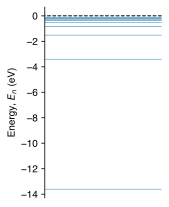

In [3]:
hatom = HydrogenAtom()
hatom.plot_energy_levels(N=10)


# Interpretations of periodic potential

## Nyquist–Shannon sampling theorem

## Brillouin Zone

In [4]:
a = 1  # lattice constant
omega = 1  # hopping parameter
amp = 1  # amplitude of wave

k1 = np.pi/a  # wave vector for first BZ, |k1|<=pi/a
n = -1  # n label of band
k2 = k1 + (n-1)*2*np.pi/a  # wave vector for nth BZ
x0 = a*np.arange(1, 6, 1)
N = len(x0)


In [5]:
def plot_sine_wave(t):
    x = np.linspace(0, 6, num=1000)
    y1 = amp*np.sin(k1*x-omega*t)
    y2 = amp*np.sin(k2*x-omega*t)

    fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
    ax.plot(x, y1, color='black', linestyle='-', lw=1)
    ax.plot(x, y2, color='red', linestyle='--', lw=1)
    ax.plot(x0, amp*np.sin(k1*x0-omega*t), 'o', color='black')
    ax.set_xlabel('x/a')
    ax.set_ylabel('Amplitude of lattice wave')
    ax.set_xlim([0, 6])
    ax.set_ylim([-1.5, 1.5])
    ax.axis('on')

    fig.tight_layout()
    plt.show()


In [6]:
interact(plot_sine_wave, t=(1e-10, 50, 0.01))


interactive(children=(FloatSlider(value=24.9900000001, description='t', max=50.0, min=1e-10, step=0.01), Outpu…

<function __main__.plot_sine_wave(t)>